In [1]:
import os

exp_dir = f"results/"

os.makedirs(f"{exp_dir}/plots", exist_ok=True)

markers = ["o", "v", "^", "s", "p", "P", "*", "X", "D"]

In [23]:
# latency cdfs data

import json
from collections import defaultdict
from datetime import datetime, timezone, timedelta

timings = defaultdict(lambda: defaultdict(list)) # mapping from config json to latency list

config_dirs = os.listdir(exp_dir)
config_dirs.sort()
for config_dir in config_dirs:    
    if config_dir == "plots":
        continue
    print(config_dir)
    
    for repeat in os.listdir(f"{exp_dir}/{config_dir}"):
        # read in configuration.json file and parse
        with open(f"{exp_dir}/{config_dir}/{repeat}/configuration.json", "r") as config_file:
            config = config_file.read()
            j = json.loads(config)
            j["repeat"] = 0

            config = json.dumps(j)

        # read logs of docker-bench
        for bencher in os.listdir(f"{exp_dir}/{config_dir}/{repeat}/logs"):
            if bencher.startswith("bencher"):
                with open(f"{exp_dir}/{config_dir}/{repeat}/logs/{bencher}", "r") as log:
                    for line in log.readlines():
                        j = line
                        try:
                            output = json.loads(j)
                        except ValueError:
                            continue

                        start_secs = output["start"]["secs_since_epoch"]
                        start_nanos = output["start"]["nanos_since_epoch"]
                        start = datetime(1970, 1, 1, tzinfo=timezone.utc) + timedelta(seconds=start_secs,microseconds=start_nanos/1000)

                        end_secs = output["end"]["secs_since_epoch"]
                        end_nanos = output["end"]["nanos_since_epoch"]
                        end = datetime(1970, 1, 1, tzinfo=timezone.utc) + timedelta(seconds=end_secs,microseconds=end_nanos/1000)

                        latency = end - start
                        timings[config]["starts"].append(start)
                        timings[config]["ends"].append(end)
                        timings[config]["latencies"].append((latency / timedelta(microseconds=1))/1000.)
        print("datapoints:", len(timings[config]["latencies"]))
        
print("loaded", len(timings))

etcd-1nodes-1benchers-PutRandom-1ms
datapoints: 100000
etcd-1nodes-1benchers-PutRange-1ms
datapoints: 100000
etcd-3nodes-1benchers-PutRandom-1ms
datapoints: 100000
etcd-3nodes-1benchers-PutRange-1ms
datapoints: 100000
etcd-5nodes-1benchers-PutRandom-1ms
datapoints: 100000
etcd-5nodes-1benchers-PutRange-1ms
datapoints: 100000
etcd-7nodes-1benchers-PutRandom-1ms
datapoints: 100000
etcd-7nodes-1benchers-PutRange-1ms
datapoints: 100000
etcd-9nodes-1benchers-PutRandom-1ms
datapoints: 100000
etcd-9nodes-1benchers-PutRange-1ms
datapoints: 100000
recetcd-1nodes-1benchers-PutRandom-1ms
datapoints: 100000
recetcd-1nodes-1benchers-PutRange-1ms
datapoints: 100000
recetcd-3nodes-1benchers-PutRandom-1ms
datapoints: 100000
recetcd-3nodes-1benchers-PutRange-1ms
datapoints: 100000
recetcd-5nodes-1benchers-PutRandom-1ms
datapoints: 100000
recetcd-5nodes-1benchers-PutRange-1ms
datapoints: 100000
recetcd-7nodes-1benchers-PutRandom-1ms
datapoints: 100000
recetcd-7nodes-1benchers-PutRange-1ms
datapoints: 10

In [3]:
# db size data

import json
from collections import defaultdict
from datetime import datetime, timezone, timedelta

config_dirs = os.listdir(exp_dir)
config_dirs.sort()
for config_dir in config_dirs:    
    if config_dir == "plots":
        continue
    print(config_dir)
    dbsize_path = f"{exp_dir}/{config_dir}"
    repeats = os.listdir(dbsize_path) 
    repeats.sort()
    for repeat in repeats:
        if os.path.exists(f"{dbsize_path}/dbsizes"):
            db_sizes = os.listdir(f"{dbsize_path}/dbsizes")
            print(db_sizes)

etcd-11nodes-1benchers-PutRandom-1ms
etcd-11nodes-1benchers-PutRandom-2ms
etcd-11nodes-1benchers-PutRandom-4ms
etcd-11nodes-1benchers-PutRandom-8ms
etcd-11nodes-1benchers-PutRange-1ms
etcd-11nodes-1benchers-PutRange-2ms
etcd-11nodes-1benchers-PutRange-4ms
etcd-11nodes-1benchers-PutRange-8ms
etcd-13nodes-1benchers-PutRange-1ms
etcd-1nodes-1benchers-PutRandom-1ms
etcd-1nodes-1benchers-PutRandom-2ms
etcd-1nodes-1benchers-PutRandom-4ms
etcd-1nodes-1benchers-PutRandom-8ms
etcd-1nodes-1benchers-PutRange-1ms
etcd-1nodes-1benchers-PutRange-2ms
etcd-1nodes-1benchers-PutRange-4ms
etcd-1nodes-1benchers-PutRange-8ms
etcd-3nodes-1benchers-PutRandom-1ms
etcd-3nodes-1benchers-PutRandom-2ms
etcd-3nodes-1benchers-PutRandom-4ms
etcd-3nodes-1benchers-PutRandom-8ms
etcd-3nodes-1benchers-PutRange-1ms
etcd-3nodes-1benchers-PutRange-2ms
etcd-3nodes-1benchers-PutRange-4ms
etcd-3nodes-1benchers-PutRange-8ms
etcd-5nodes-1benchers-PutRandom-1ms
etcd-5nodes-1benchers-PutRandom-2ms
etcd-5nodes-1benchers-PutRandom-

In [3]:
import pandas as pd

l = {k:v["latencies"] for (k,v) in timings.items()}

series = pd.DataFrame(l)
series.describe()

,"{""image_name"": ""quay.io/coreos/etcd:v3.4.13"", ""repeat"": 0, ""bench_type"": ""PutRandom"", ""cluster_size"": 1, ""bencher_count"": 1, ""bencher_clients"": 100, ""bencher_iterations"": 1000, ""bencher_interval"": 1, ""tmpfs"": false}","{""image_name"": ""quay.io/coreos/etcd:v3.4.13"", ""repeat"": 0, ""bench_type"": ""PutRange"", ""cluster_size"": 1, ""bencher_count"": 1, ""bencher_clients"": 100, ""bencher_iterations"": 1000, ""bencher_interval"": 1, ""tmpfs"": false}","{""image_name"": ""jeffas/recetcd:latest"", ""repeat"": 0, ""bench_type"": ""PutRandom"", ""cluster_size"": 1, ""bencher_count"": 1, ""bencher_clients"": 100, ""bencher_iterations"": 1000, ""bencher_interval"": 1, ""tmpfs"": false}","{""image_name"": ""jeffas/recetcd:latest"", ""repeat"": 0, ""bench_type"": ""PutRange"", ""cluster_size"": 1, ""bencher_count"": 1, ""bencher_clients"": 100, ""bencher_iterations"": 1000, ""bencher_interval"": 1, ""tmpfs"": false}"
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,64.350697,62.859654,87.371159,85.481001
std,55.058415,55.470511,27.106762,28.354880
min,2.462000,0.886000,13.247000,15.504000
25%,29.390750,27.440000,76.145000,67.275000
50%,40.431000,39.143500,82.215000,82.717000
75%,125.887250,122.386500,87.075000,90.114250
max,210.200000,216.334000,289.321000,297.900000


In [24]:
# load throughput
for (k, v) in timings.items():
    config = json.loads(k)
    start = min(v["starts"])
    end = max(v["ends"])
    duration = (end - start).total_seconds()
    throughput = len(v["starts"]) / duration
    v["throughput"] = throughput
    v["target_throughput"] = (1000 * config["bencher_clients"]) // config["bencher_interval"]

In [25]:
# plot percentile latencies of datastores at differing cluster sizes

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_throughput(bench_type):
    f = plt.figure()
    f.set_figwidth(6.4 * 2)
    f.set_figheight(4.8 * 2)
    
    index = 0
    
    ls = {} # mapping from legend item to list of datapoints

    for (k, v) in timings.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue
        
        cluster_size = config["cluster_size"]
        if "quay.io/coreos/etcd" in config["image_name"]:
            image = "etcd"
        elif config["image_name"] == "jeffas/eckd":
            image = "eckd"
        elif "jeffas/recetcd" in config["image_name"]:
            image = "mergeable-etcd"
        else:
            print("unmatched image name:", config["image_name"])
            
        throughput = v["throughput"]
        
        image += f"{v['target_throughput']}"
        
        if image not in ls:
            ls[image] = {}

        ls[image][cluster_size] = throughput
            
    
    meds = defaultdict(list)
    for (image, sizes) in ls.items():
        for (size, tp) in sizes.items():
            ps = np.mean(tp)
            meds[image].append((size, ps))
                
    xs = []  
    for (image, axes) in meds.items():
        axes.sort(key=lambda t: t[0])
        xs, ys = [[ i for i, j in axes ], [ j for i, j in axes ]]
        plt.plot(xs, ys, marker=markers[index % len(markers)], label=f"{image}")
        index += 1

    plt.grid()
    plt.title(f"Throughput ({bench_type})")
    plt.ylabel("Throughput (req/s)")
    plt.xlabel("Cluster size")
    plt.xticks(xs)
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/throughput-{lower_bench_type}.pdf")
    plt.savefig(f"{exp_dir}/plots/throughput-{lower_bench_type}.svg")

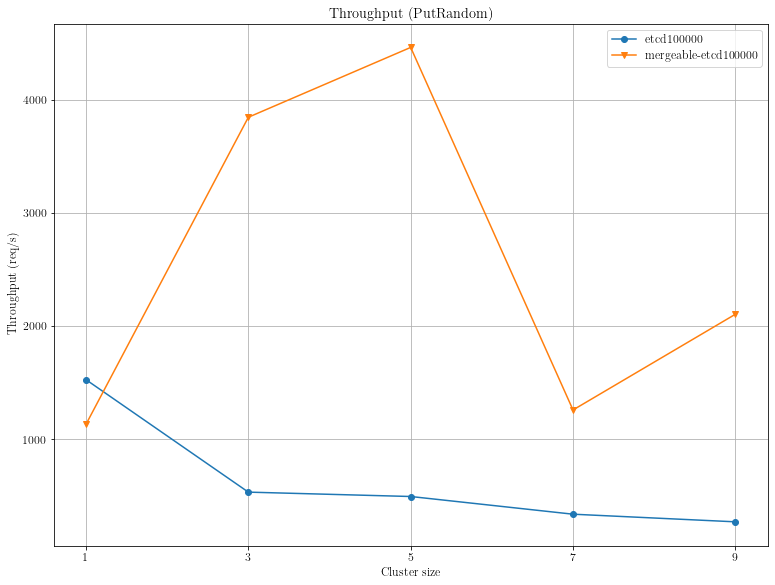

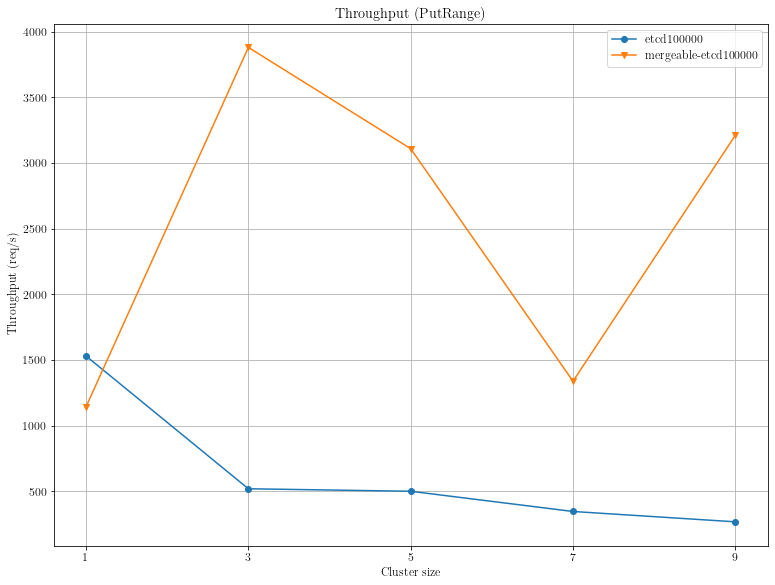

In [26]:
for ty in ["PutRandom", "PutRange"]:
    plot_throughput(ty)

In [28]:
# throughput vs goodput

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_throughput_v_goodput(bench_type):
    f = plt.figure()
    f.set_figwidth(6.4 * 2)
    f.set_figheight(4.8 * 2)
    
    index = 0
    
    ls = {} # mapping from legend item to list of datapoints

    for (k, v) in timings.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue
        
        cluster_size = config["cluster_size"]
            
        if "quay.io/coreos/etcd" in config["image_name"]:
            image = "etcd"
        elif config["image_name"] == "jeffas/eckd":
            image = "eckd"
        elif "jeffas/recetcd" in config["image_name"]:
            image = "mergeable-etcd"
        else:
            print("unmatched image name:", config["image_name"])
            
        image += f"x{cluster_size}"
        goodput = v["throughput"]
        throughput = v["target_throughput"]
                
        if image not in ls:
            ls[image] = {}

        ls[image][cluster_size] = (goodput, throughput)
            
    
    meds = defaultdict(list)
    for (image, sizes) in ls.items():
        for (size, (gp, tp)) in sizes.items():
            meds[image].append((tp, gp))
                
    xs = []
    for (image, axes) in meds.items():
        axes.sort(key=lambda t: t[0])
        xs, ys = [[ i for i, j in axes ], [ j for i, j in axes ]]
        plt.plot(xs, ys, marker=markers[index % len(markers)], label=f"{image}")
        index += 1

    plt.grid()
    plt.title(f"Throughput ({bench_type})")
    plt.xlabel("Target Throughput (req/s)")
    plt.ylabel("Goodput (req/s)")
    plt.xticks(xs)
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/throughput-{lower_bench_type}.pdf")
    plt.savefig(f"{exp_dir}/plots/throughput-{lower_bench_type}.svg")

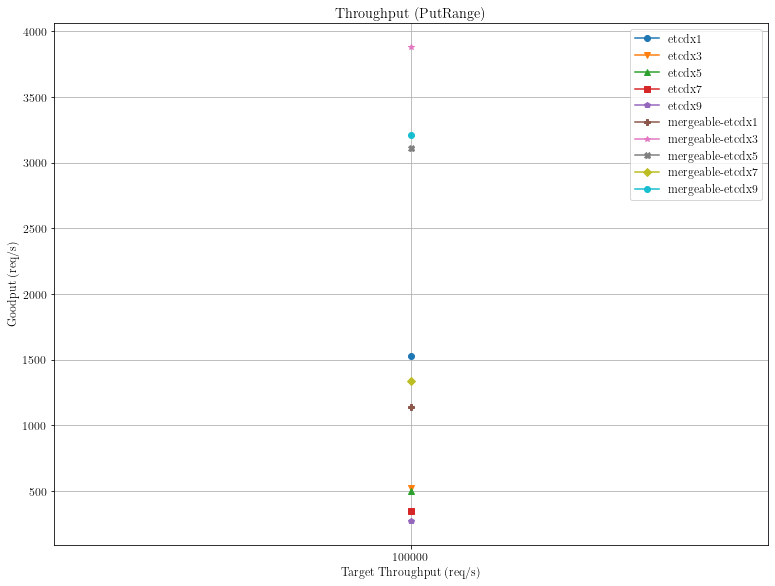

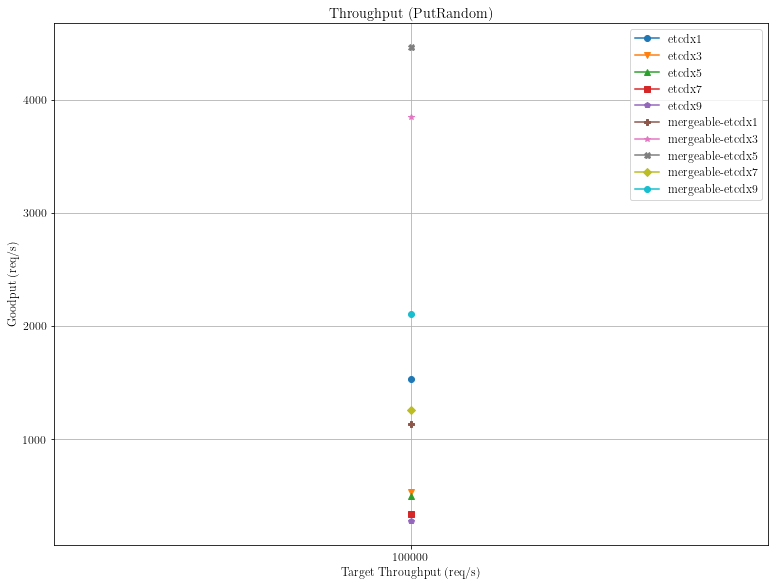

In [29]:
for ty in ["PutRange", "PutRandom"]:
    plot_throughput_v_goodput(ty)

In [8]:
# latency scatter plots

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_scatter(bench_type, cluster_size):
    f = plt.figure()
    f.set_figwidth(6.4 * 1)
    f.set_figheight(4.8 * 1)

    index = 0
    
    for (k, v) in timings.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue

        if config["cluster_size"] == cluster_size:
            if "quay.io/coreos/etcd" in config["image_name"]:
                image = "etcd"
            elif config["image_name"] == "jeffas/eckd":
                image = "eckd"
            elif "jeffas/recetcd" in config["image_name"]:
                image = "mergeable-etcd"
            else:
                print("unmatched image name:", config["image_name"])
                        
            starts = v["starts"]
            start = starts[0]
            starts = [(s - start) / timedelta(seconds=1) for s in starts]
            latencies = v["latencies"]

            plt.scatter(starts, latencies, marker=markers[index % len(markers)], label=f"{image} x{cluster_size}")
            index += 1
            
    plt.grid()
    plt.title(f"Latency Scatter ({bench_type})")
    plt.xlabel("Time from start (s)")
    plt.ylabel("Request duration (ms)")
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/latency-scatter-{lower_bench_type}.pdf")

In [9]:
for ty in ["PutRange", "PutRandom"]:
    for size in range(1, 13, 2):
        plot_scatter(ty, size)

NameError: name 'plot_scatter' is not defined

In [9]:
# latency cdfs plots

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_cdf(bench_type, cluster_size):
    f = plt.figure()
    scale = 2
    f.set_figwidth(6.4 * scale)
    f.set_figheight(4.8 * scale)
    
    index = 0
    
    grouped_latencies = defaultdict(list)     

    for (k, v) in timings.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue

        if config["cluster_size"] == cluster_size:
            latencies = v["latencies"]
            
            del config["repeat"]
            k = json.dumps(config)
            grouped_latencies[k] += latencies
            
    for (k, v) in grouped_latencies.items():
        config = json.loads(k)
        if "quay.io/coreos/etcd" in config["image_name"]:
            image = "etcd"
        elif config["image_name"] == "jeffas/eckd":
            image = "eckd"
        elif "jeffas/recetcd" in config["image_name"]:
            image = "mergeable-etcd"
        else:
            print("unmatched image name:", config["image_name"])
        
        latencies = v
        latencies.sort()
        size = len(latencies)
        ys = np.array(range(size))/ float(size)
        
        plt.plot(latencies, ys, label=f"{image} x{cluster_size}")
        index += 1
        
    plt.grid()
    plt.title(f"Latency CDF ({bench_type})")
    plt.xlabel("Request duration (ms)")
    plt.ylabel("Probability")
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/latency-cdf-{lower_bench_type}-{cluster_size}.pdf")
    plt.savefig(f"{exp_dir}/plots/latency-cdf-{lower_bench_type}-{cluster_size}.svg")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


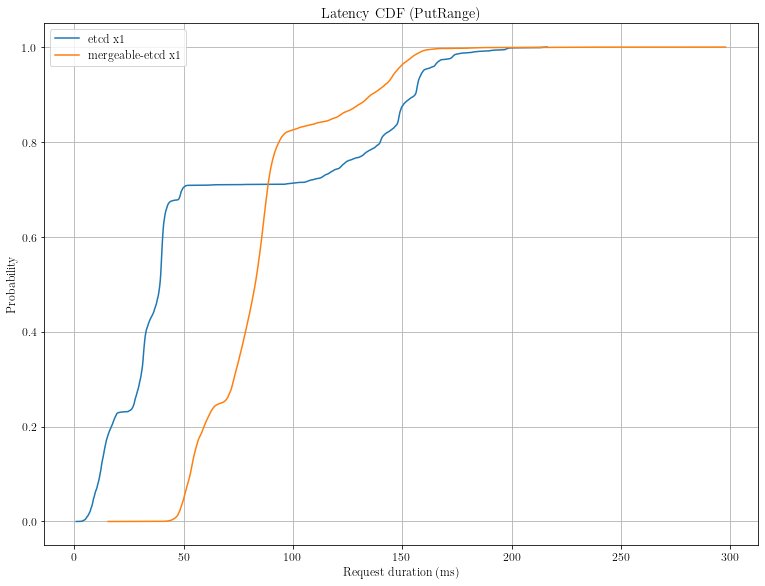

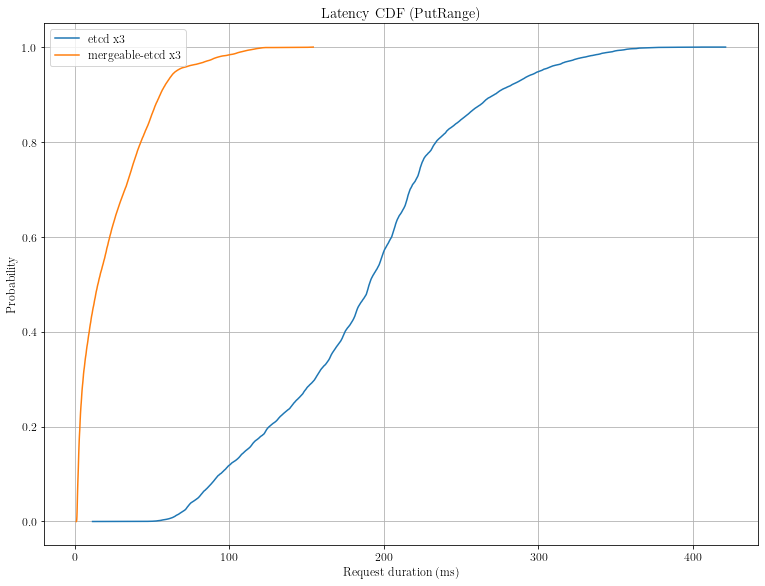

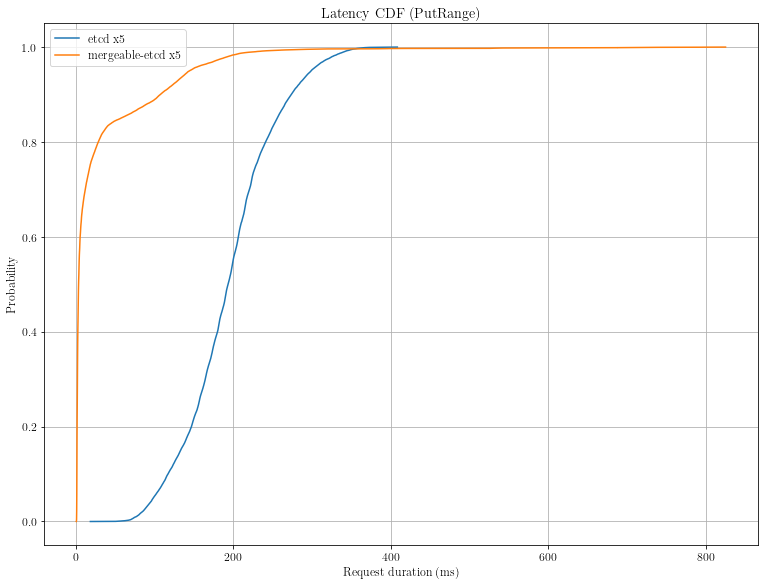

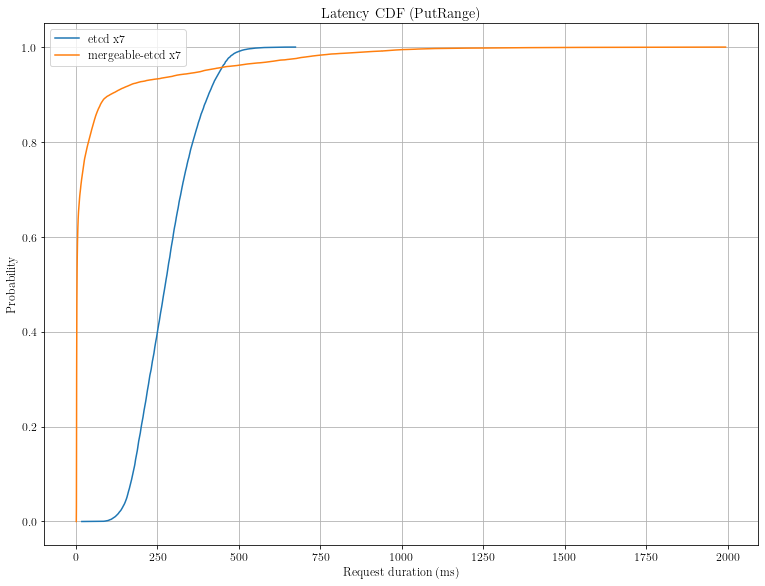

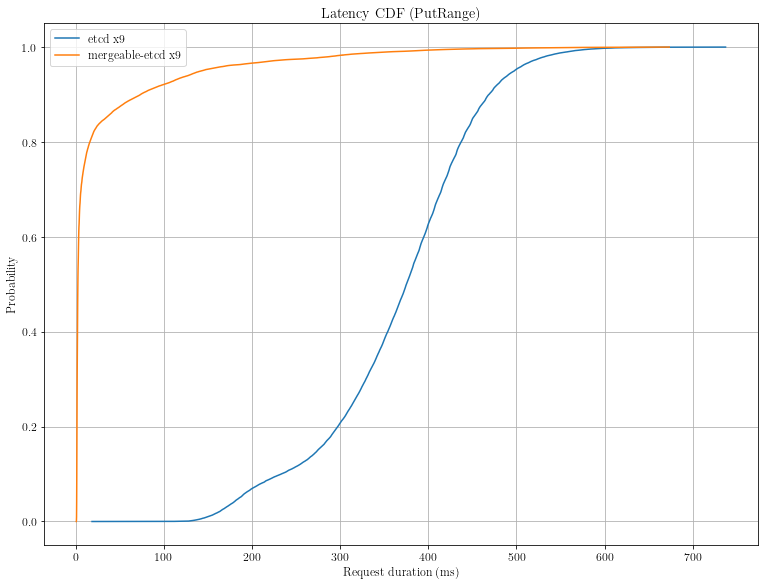

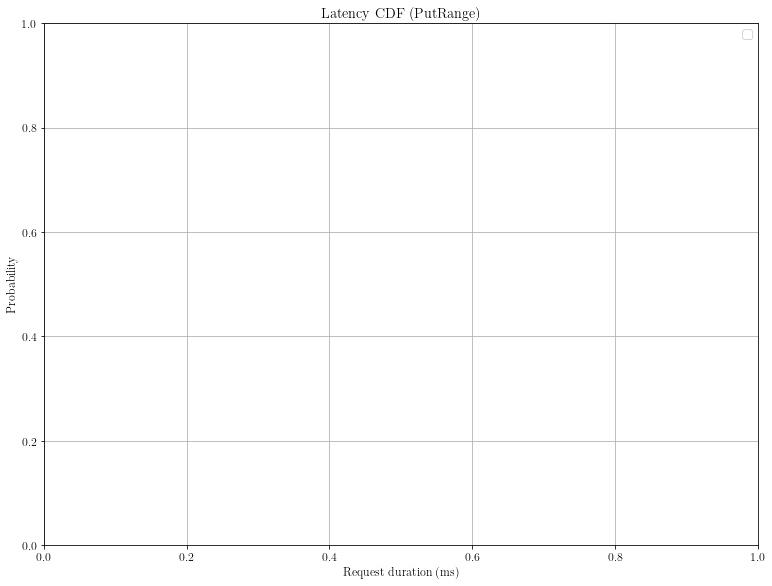

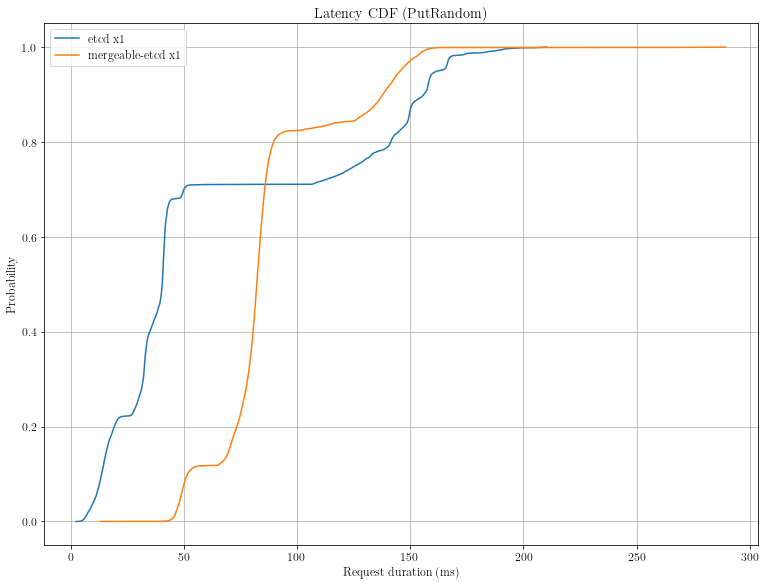

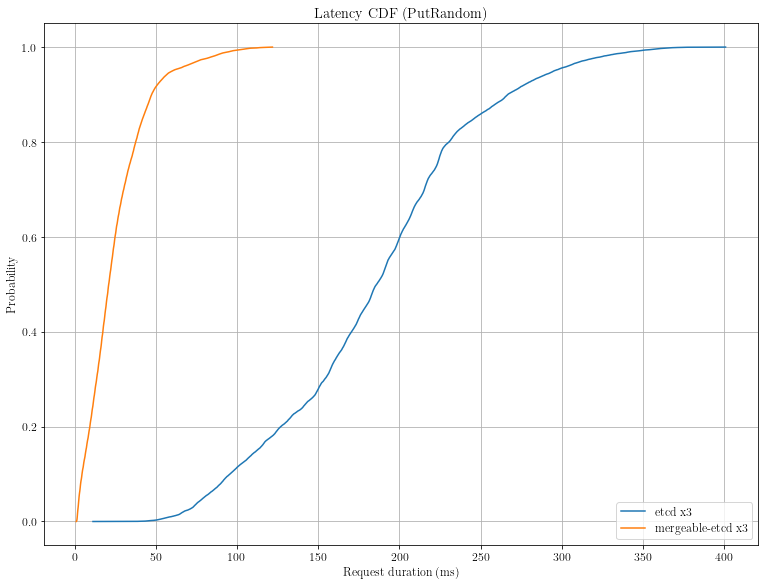

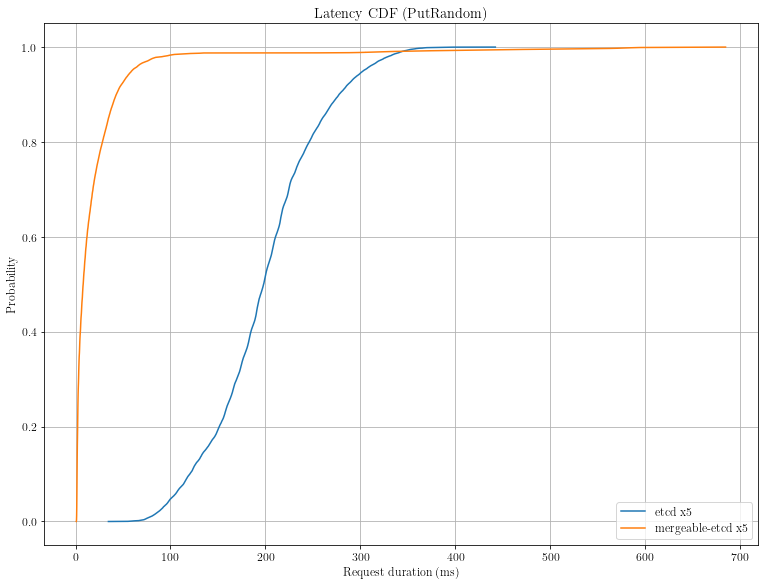

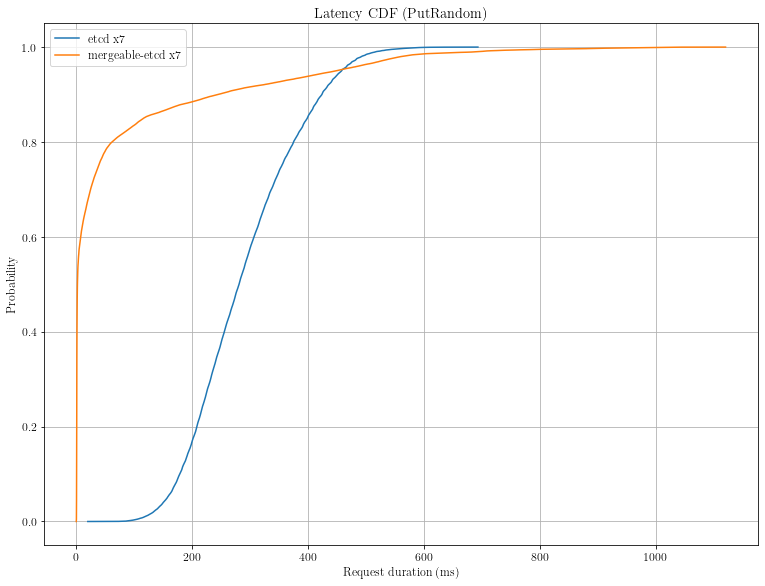

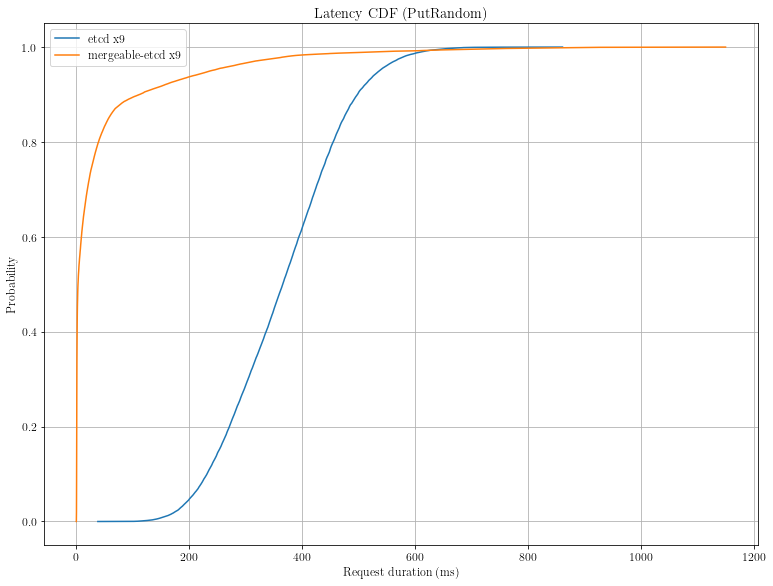

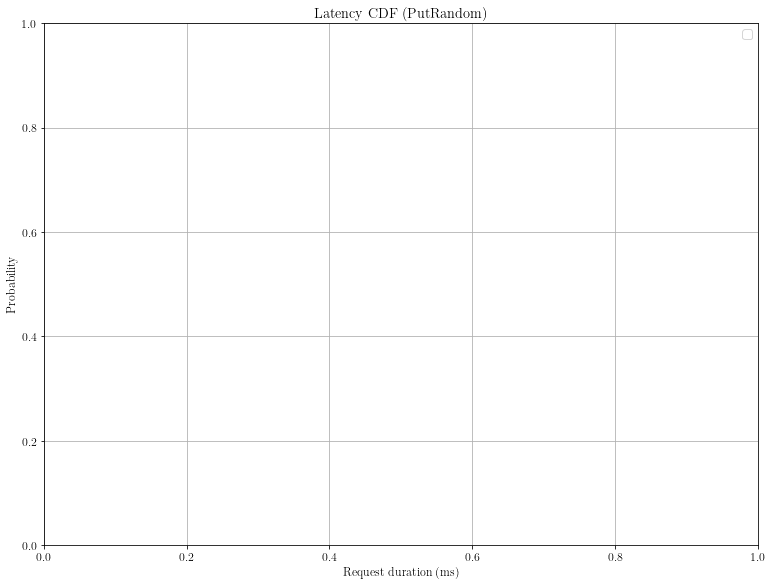

In [30]:
for ty in ["PutRange", "PutRandom"]:
    for size in range(1, 13, 2):
        plot_cdf(ty, size)

In [11]:
# latency cdfs plots grouping cluster size

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_cdf_grouped(bench_type, cluster_sizes):
    f = plt.figure()
    scale = 2
    f.set_figwidth(6.4 * scale)
    f.set_figheight(4.8 * scale)
    
    index = 0
    
    grouped_latencies = defaultdict(list)     

    for (k, v) in timings.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue
        
        if config["bencher_interval"] != 1:
            continue

        if config["cluster_size"] in cluster_sizes:
            latencies = v["latencies"]
            
            del config["repeat"]
            k = json.dumps(config)
            grouped_latencies[k] += latencies
            
    for (k, v) in grouped_latencies.items():
        config = json.loads(k)
        if "quay.io/coreos/etcd" in config["image_name"]:
            image = "etcd"
        elif config["image_name"] == "jeffas/eckd":
            image = "eckd"
        elif "jeffas/recetcd" in config["image_name"]:
            image = "mergeable-etcd"
        else:
            print("unmatched image name:", config["image_name"])
        
        latencies = v
        latencies.sort()
        size = len(latencies)
        ys = np.array(range(size))/ float(size)
        
        plt.plot(latencies, ys, label=f"{image} x{config['cluster_size']}")
        index += 1
        
    plt.grid()
    plt.title(f"Latency CDF ({bench_type})")
    plt.xlabel("Request duration (ms)")
    plt.ylabel("Probability")
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/latency-cdf-grouped-{lower_bench_type}-{cluster_sizes}.pdf")
    plt.savefig(f"{exp_dir}/plots/latency-cdf-grouped-{lower_bench_type}-{cluster_sizes}.svg")

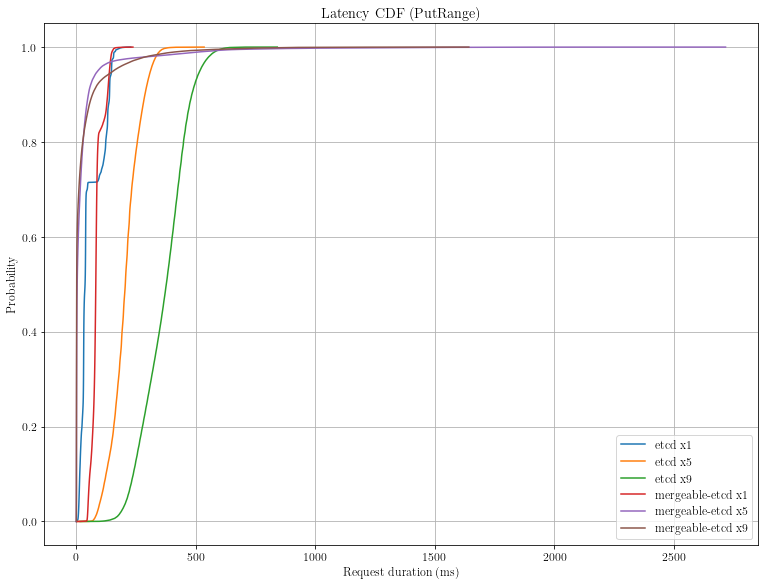

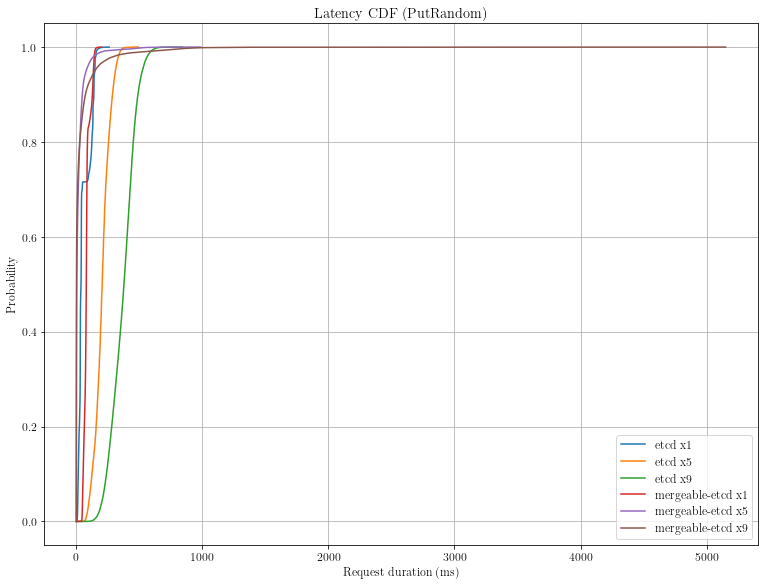

In [8]:
for ty in ["PutRange", "PutRandom"]:
    plot_cdf_grouped(ty, [1, 5, 9])

In [12]:
# plot percentile latencies of datastores at differing cluster sizes

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_latency_percentiles(bench_type, percentiles=[50]):
    f = plt.figure()
    f.set_figwidth(6.4 * 2)
    f.set_figheight(4.8 * 2)
    
    index = 0
    
    ls = {} # mapping from legend item to list of datapoints

    for (k, v) in timings.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue
        
        cluster_size = config["cluster_size"]
        if "quay.io/coreos/etcd" in config["image_name"]:
            image = "etcd"
        elif config["image_name"] == "jeffas/eckd":
            image = "eckd"
        elif "jeffas/recetcd" in config["image_name"]:
            image = "mergeable-etcd"
        else:
            print("unmatched image name:", config["image_name"])
            
        latencies = v["latencies"]
        
        if image not in ls:
            ls[image] = {}
        if cluster_size not in ls[image]:
            ls[image][cluster_size] = []
        ls[image][cluster_size] += latencies
            
    
    meds = defaultdict(list)
    for (image, sizes) in ls.items():
        for (size, latencies) in sizes.items():
            ps = np.percentile(latencies, percentiles)
            for (i, p) in enumerate(ps):
                i = f"{image}-{percentiles[i]}"
                meds[i].append((size, p))
    xs = []      
    for (image, axes) in meds.items():
        axes.sort(key=lambda t: t[0])
        xs, ys = [[ i for i, j in axes ], [ j for i, j in axes ]]
        plt.plot(xs, ys, marker=markers[index % len(markers)], label=f"{image}")
        index += 1
        
    plt.grid()
    plt.title(f"Latency Percentiles ({bench_type})")
    plt.ylabel("Request duration (ms)")
    plt.xlabel("Cluster size")
    plt.xticks(xs)
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/latency-percentiles-{lower_bench_type}-{percentiles}.pdf")
    plt.savefig(f"{exp_dir}/plots/latency-percentiles-{lower_bench_type}-{percentiles}.svg")

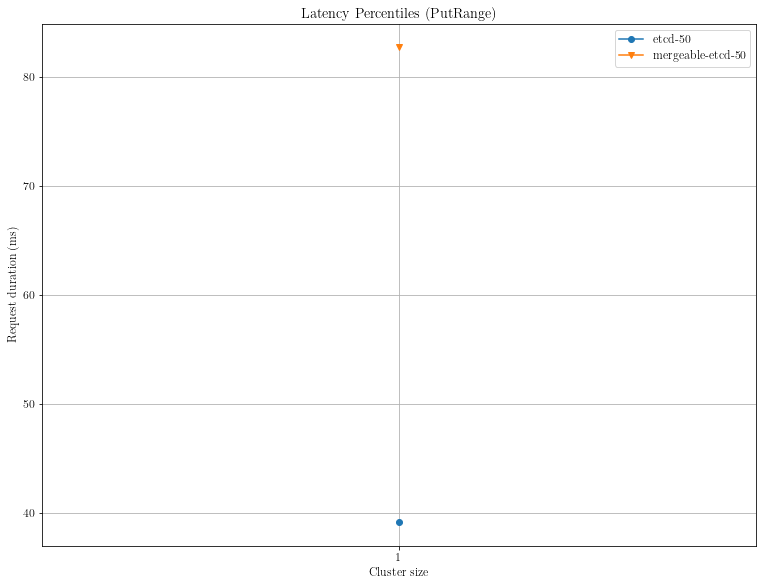

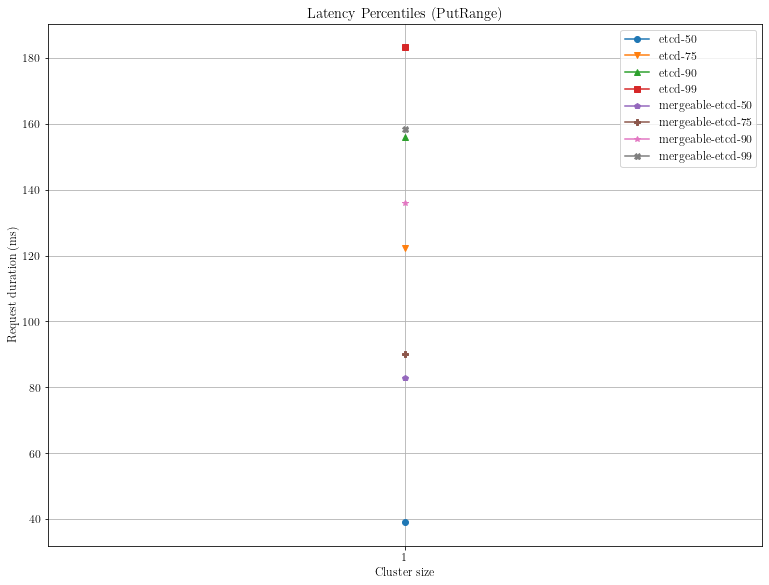

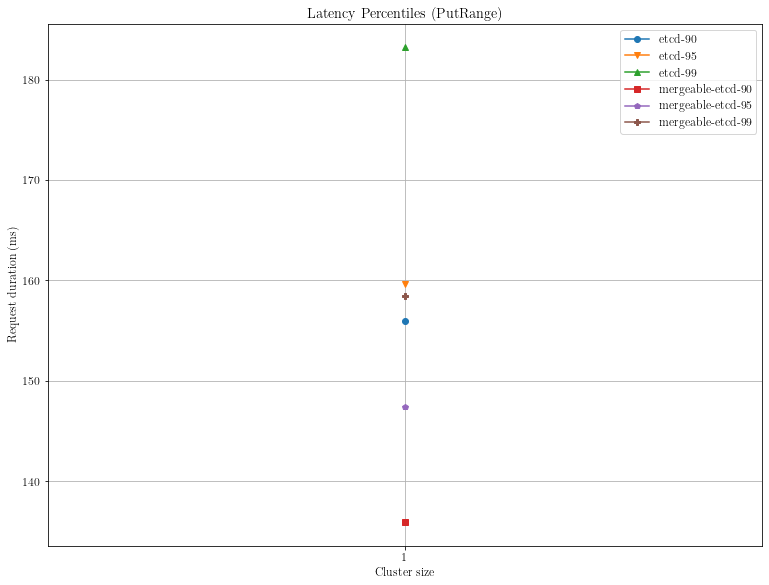

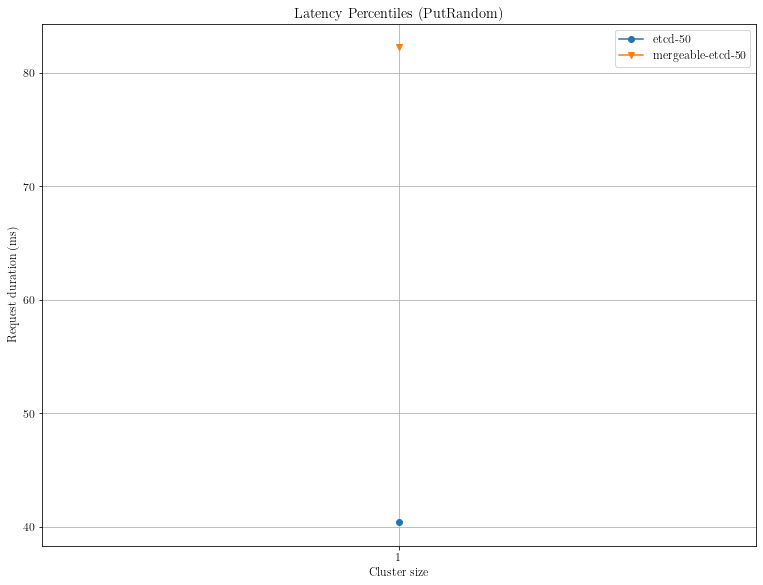

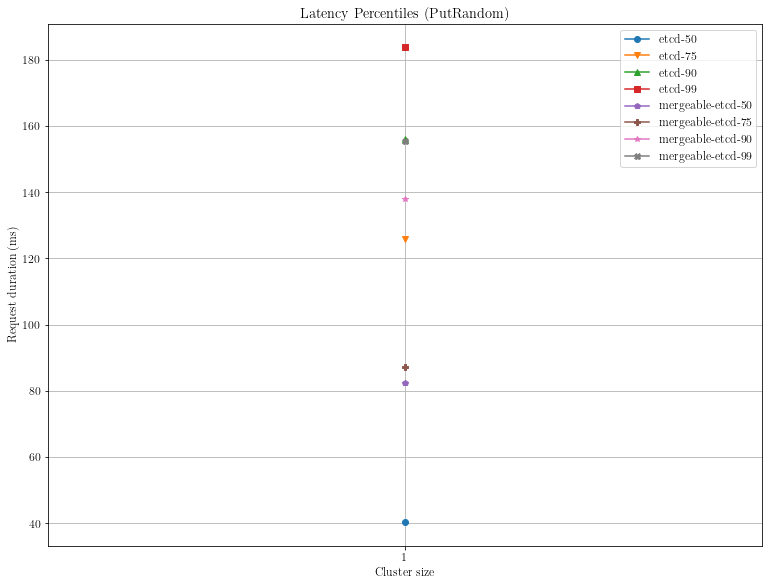

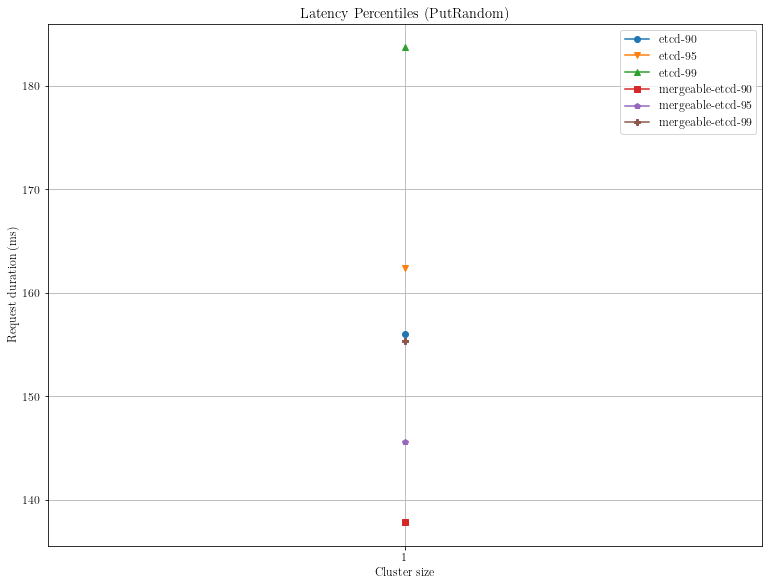

In [13]:
for ty in ["PutRange", "PutRandom"]:
    for percentiles in [[50], [50, 75, 90, 99], [90, 95, 99]]:
        plot_latency_percentiles(ty, percentiles = percentiles)

In [14]:
# plot percentile latencies of datastores at differing cluster sizes

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

scale_factor = 1

def plot_latency_percentiles_fill(bench_type, percentiles):
    f = plt.figure()
    f.set_figwidth(6.4 * scale_factor)
    f.set_figheight(4.8 * scale_factor)
    
    index = 0
    
    ls = {} # mapping from legend item to list of datapoints

    for (k, v) in timings.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue
        
        cluster_size = config["cluster_size"]
        if "quay.io/coreos/etcd" in config["image_name"]:
            image = "etcd"
        elif config["image_name"] == "jeffas/eckd":
            image = "eckd"
        elif "jeffas/recetcd" in config["image_name"]:
            image = "mergeable-etcd"
        else:
            print("unmatched image name:", config["image_name"])
            
        latencies = v["latencies"]
        
#         image += str(v["target_throughput"])
        
        if image not in ls:
            ls[image] = {}
        if cluster_size not in ls[image]:
            ls[image][cluster_size] = []
        ls[image][cluster_size] += latencies
            
    
    meds = defaultdict(list)

    for (image, sizes) in ls.items():
        for (size, latencies) in sizes.items():
            ps = np.percentile(latencies, percentiles)
            meds[image].append((size, ps))
                
    xs = []      
    for (image, axes) in meds.items():
        axes.sort(key=lambda t: t[0])
        xs, ys, lows, highs = [[i for i, j in axes], [j[1] for i, j in axes], [j[0] for i, j in axes], [j[2] for i, j in axes]]
        plt.plot(xs, ys, marker=markers[index % len(markers)], label=f"{image}")
        plt.fill_between(xs, lows, highs, alpha=0.2)
        index += 1
        
    plt.grid()
    plt.title(f"Latency ({bench_type})")
    plt.ylabel("Request duration (ms)")
    plt.xlabel("Cluster size")
    plt.xticks(xs)
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/latency-percentiles-fill-{lower_bench_type}-{percentiles}.pdf")
    plt.savefig(f"{exp_dir}/plots/latency-percentiles-fill-{lower_bench_type}-{percentiles}.svg")

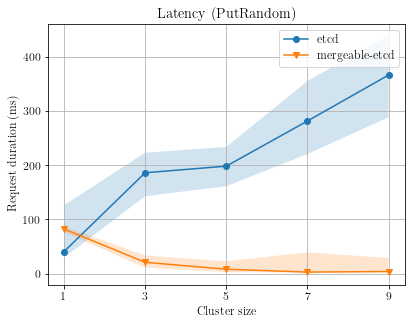

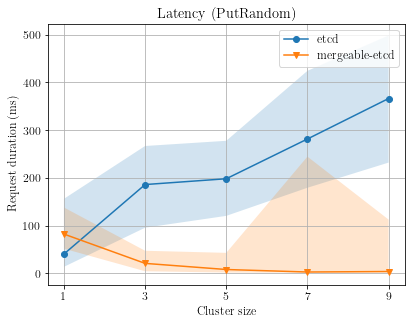

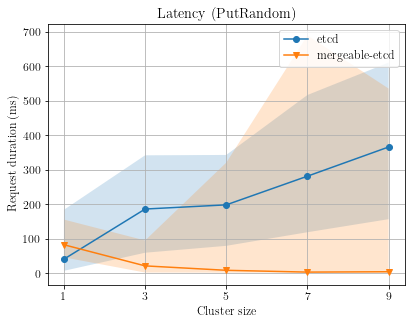

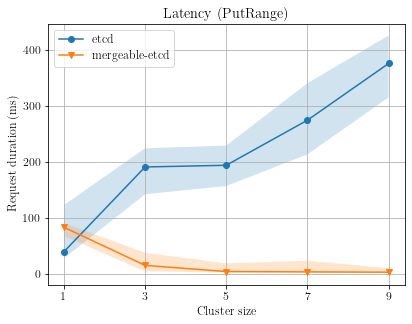

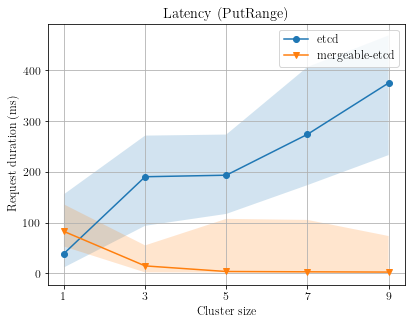

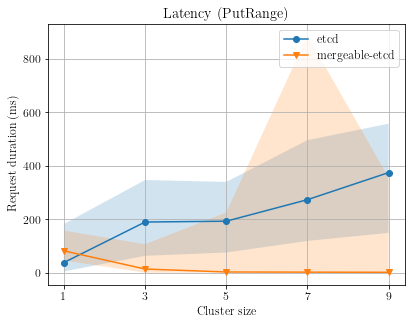

In [31]:
for ty in ["PutRandom", "PutRange"]:
    for bounds in [[25, 50, 75], [10, 50, 90], [1, 50, 99]]:
        plot_latency_percentiles_fill(ty, bounds)

In [ ]:
# get cpu and mem data

import json
from collections import defaultdict
from datetime import datetime, timezone, timedelta

cpu_usage = {} # mapping from config json to cpu usage list
mem_usage = {} # mapping from config json to mem usage list

for config in config_dirs:
    print("processing", config)
    c = json.dumps(json.loads("".join(open(f"{exp_dir}/{config}/configuration.json").readlines())))

    for repeat in os.listdir(f"{exp_dir}/{config}"):
        if repeat.startswith("repeat"):
            with open(f"{exp_dir}/{config}/{repeat}/logs/docker-bench.log", "r") as log:
                for line in log.readlines():
                    j = line.split()[1]
                    try:
                        output = json.loads(j)
                    except ValueError:
                        continue

                    start_secs = output["start"]["secs_since_epoch"]
                    start_nanos = output["start"]["nanos_since_epoch"]
                    start = datetime(1970, 1, 1) + timedelta(seconds=start_secs,microseconds=start_nanos/1000)
                    break
                    
            # read metrics of node*
            with open(f"{exp_dir}/{config}/{repeat}/metrics/docker-node1.stat", "r") as stats:
                times = []
                cpus = []
                mems = []
                for line in stats.readlines():
                    sp = line.split()
                    
                    dt = sp[0]
                    dt = dt.replace("+00:00","")
                    dot = dt.find(".")
        
                    dt = datetime.fromisoformat(dt[:dot+7])
             
                    times.append(dt-start)
                    j = sp[1]
                    
                    output = json.loads(j)
                    
                    # from https://github.com/docker/cli/blob/bf4a96e5640f86860e68622d2498039d86bf5714/cli/command/container/stats_helpers.go#L166
                    cpu_percent = 0
                    cpu_delta = output["cpu_stats"]["cpu_usage"]["total_usage"] - output["precpu_stats"]["cpu_usage"]["total_usage"]
                    system_delta = output["cpu_stats"]["system_cpu_usage"] - (output["precpu_stats"]["system_cpu_usage"] or 0)
                    online_cpus = output["cpu_stats"]["online_cpus"]
                    if online_cpus == 0:
                        print("no cpus!!")
                    if system_delta > 0 and cpu_delta > 0:
                        cpu_percent = (float(cpu_delta) / float(system_delta)) * float(online_cpus) * 100.0
                    cpus.append(cpu_percent)
                    
                    
                    mem = output["memory_stats"]["usage"]
                    mems.append(mem)
                
                cpu_usage[c] = (times, cpus)
                mem_usage[c] = (times, mems)

In [ ]:
# cpu usage plots

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_cpu(bench_type, cluster_size):

    f = plt.figure()
    f.set_figwidth(6.4 * 1)
    f.set_figheight(4.8 * 1)

    for (k, v) in cpu_usage.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue

        if config["cluster_size"] == cluster_size:
            if config["image_name"] == "quay.io/coreos/etcd":
                image = "etcd"
            elif config["image_name"] == "jeffas/eckd":
                image = "eckd"
            elif config["image_name"] == "jeffas/recetcd":
                image = "mergeable-etcd"
            else:
                print("unmatched image name:", config["image_name"])

            xs = [x.total_seconds() for x in v[0]]
            ys = v[1]

            plt.plot(xs, ys, label=f"{image} x{cluster_size}")

    plt.grid()
    plt.title(f"CPU Usage ({bench_type})")
    plt.xlabel("Time since start (s)")
    plt.ylabel("CPU usage (\%)")
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/cpu-usage-{lower_bench_type}.pdf")

In [ ]:
plot_cpu("PutRange", 1)

In [ ]:
plot_cpu("PutSingle", 1)

In [ ]:
plot_cpu("PutRandom", 1)

In [ ]:
plot_cpu("PutRange", 3)

In [ ]:
plot_cpu("PutSingle", 3)

In [ ]:
plot_cpu("PutRandom", 3)

In [ ]:
plot_cpu("PutRange", 5)

In [ ]:
plot_cpu("PutSingle", 5)

In [ ]:
plot_cpu("PutRandom", 5)

In [ ]:
# mem usage plots

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

def plot_mem(bench_type, cluster_size):
    f = plt.figure()
    f.set_figwidth(6.4 * 1)
    f.set_figheight(4.8 * 1)

    for (k, v) in mem_usage.items():
        config = json.loads(k)
        if config["bench_type"] != bench_type:
            continue

        if config["cluster_size"] == cluster_size:
            if config["image_name"] == "quay.io/coreos/etcd":
                image = "etcd"
            elif config["image_name"] == "jeffas/eckd":
                image = "eckd"
            elif config["image_name"] == "jeffas/recetcd":
                image = "mergeable-etcd"
            else:
                print("unmatched image name:", config["image_name"])

            xs = [x.total_seconds() for x in v[0]]
            ys = np.array(v[1]) / 1_000_000

            plt.plot(xs, ys, label=f"{image} x{cluster_size}")

    plt.grid()
    plt.title(f"Memory Usage ({bench_type})")
    plt.xlabel("Time since start (s)")
    plt.ylabel("Memory usage (MB)")
    plt.legend()

    lower_bench_type = bench_type.lower()
    plt.savefig(f"{exp_dir}/plots/mem-usage-{lower_bench_type}.pdf")

In [ ]:
plot_mem("PutRange", 1)

In [ ]:
plot_mem("PutSingle", 1)

In [ ]:
plot_mem("PutRandom", 1)

In [ ]:
plot_mem("PutRange", 3)

In [ ]:
plot_mem("PutSingle", 3)

In [ ]:
plot_mem("PutRandom", 3)

In [ ]:
plot_mem("PutRange", 5)

In [ ]:
plot_mem("PutSingle", 5)

In [ ]:
plot_mem("PutRandom", 5)